# Exercise 1

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    return [row[index] for row in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

## Question 1

In [2]:
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]) , sum(X[1][:5]) , sum(X[2][:5]) , sum(y[:5])] 
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


# Exercise 2

In [7]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_wi(xi, y, y_hat):
    return 2 * (y_hat - y) * xi

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss(y_hat, y)

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)
    return w1, w2, w3, b, losses


## Question 2

In [8]:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5) 
print(y)

1.0


## Question 3

In [9]:
l = compute_loss(y_hat=1, y=0.5) 
print(l)

0.25


## Question 4

In [6]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat =0.5) 
print(g_wi)

-1.0


## Question 5

In [10]:
g_b = compute_gradient_b(y=2.0, y_hat =0.5) 
print(g_b)

-3.0


## Question 6

In [11]:
after_wi = update_weight_wi(wi=1.0, dl_dwi =-0.5, lr = 1e-5) 
print(after_wi)

1.000005


## Question 7

In [12]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5) 
print(after_b) 
print(after_wi)

0.50001
1.000005


## Question 8

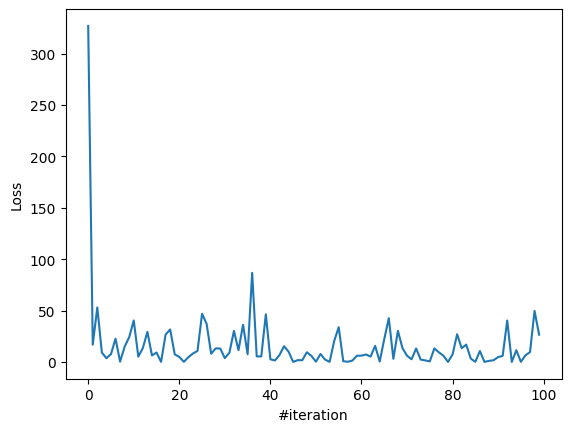

In [13]:
X, y = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [14]:
print(w1 , w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


## Question 9

In [15]:
tv = 19.2 
radio = 35.9 
newspaper = 51.3

X,y = prepare_data('advertising.csv') 
(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression(X, y, epoch_max =50, lr=1e-5)
sales = predict(tv, radio , newspaper , w1 , w2, w3, b) 
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


## Question 10

In [17]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

In [18]:
l = compute_loss_mae(y_hat=1, y=0.5) 
print(l)

0.5


# Exercise 3

In [23]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=1000, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        for i in range(N):
            
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss = compute_loss(y_hat, y)
            loss_total += loss
            
            dw1_total += compute_gradient_wi(x1, y, y_hat)
            dw2_total += compute_gradient_wi(x2, y, y_hat)
            dw3_total += compute_gradient_wi(x3, y, y_hat)
            db_total += compute_gradient_b(y, y_hat)
        
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)
        
        losses.append(loss_total / N)
    return w1, w2, w3, b, losses

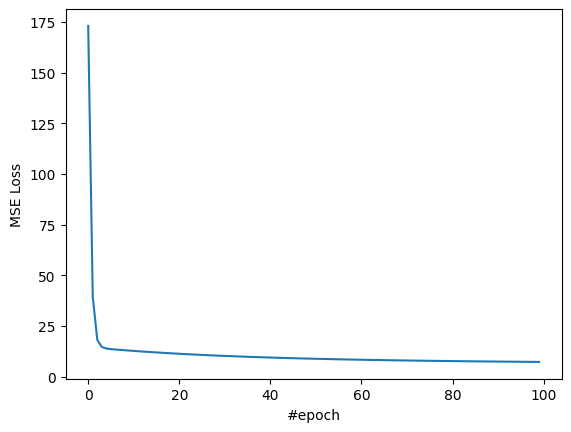

In [24]:
w1, w2, w3, b, losses_nsamples = implement_linear_regression_nsamples(X, y, epoch_max=100)
plt.plot(losses_nsamples)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

## Question 11

In [25]:
X,y = prepare_data('advertising.csv') 
#using MSE loss 
(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression_nsamples(X, y, epoch_max =1000, lr=1e-5)
print(w1 ,w2 ,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


# Exercise 4

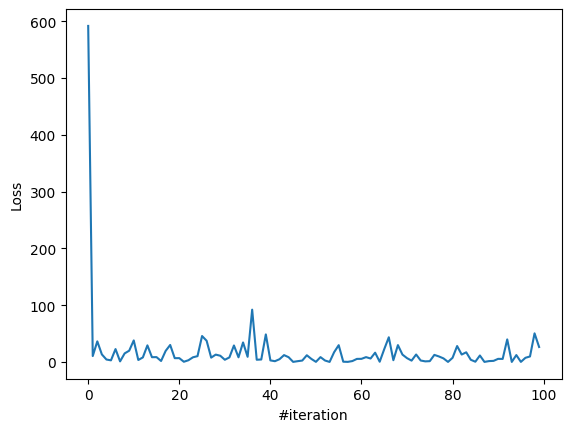

[0.13922134568608693, 0.07405993048589583, 0.1591738341288154, 0.01756130169377892]


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random


def get_column(data, index):
    return [row[index] for row in data]

def prepare_data_with_bias(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    # Xây dựng X và y
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

def predict_with_bias(X_features, weights):
    return sum([x * w for x, w in zip(X_features, weights)])

def compute_gradient_w(X_features, y, y_hat):
    return [2 * (y_hat - y) * x for x in X_features]

def update_weights(weights, gradients, lr):
    return [w - lr * dw for w, dw in zip(weights, gradients)]

def implement_linear_regression_with_bias(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    weights = [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]  # Khởi tạo cố định
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
           
            features_i = X_data[i]
            y = y_data[i]
            
            y_hat = predict_with_bias(features_i, weights)
            
            loss = (y_hat - y) ** 2
            
            gradients = compute_gradient_w(features_i, y, y_hat)
            
            weights = update_weights(weights, gradients, lr)
           
            losses.append(loss)
    return weights, losses


X_bias, y_bias = prepare_data_with_bias('advertising.csv')
weights, losses_bias = implement_linear_regression_with_bias(X_bias, y_bias)
plt.plot(losses_bias[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()


print(weights)

## Question 12

In [36]:
X,y = prepare_data_with_bias('advertising.csv') 
W,L = implement_linear_regression_with_bias(X, y, epoch_max =50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999])

31.339223408109948
